### Poll
LinkedIn: Python Statistics (Michele Vallisneri)

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [6]:
poll = pd.read_csv('poll.csv')

In [7]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [9]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [10]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [11]:
s = sample(0.51,n=1000)

In [12]:
s.vote.value_counts(normalize=True)

Brown    0.502
Green    0.498
Name: vote, dtype: float64

In [13]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [14]:
dist.head()

,Brown,Green
vote,0.515,0.485
vote,0.513,0.487
vote,0.502,0.498
vote,0.492,0.508
vote,0.528,0.472


<AxesSubplot:>

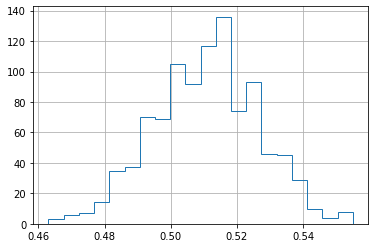

In [15]:
dist.Brown.hist(histtype='step',bins=20)

In [16]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [17]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [18]:
quantiles(0.50)

(0.471, 0.533025)

In [19]:
quantiles(0.48)

(0.449, 0.511)

In [20]:
quantiles(0.54)

(0.51, 0.573)

In [21]:
dist = samplingdist(0.50,10000)

<AxesSubplot:>

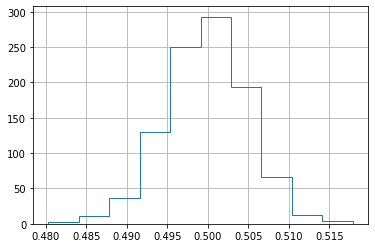

In [22]:
dist.Brown.hist(histtype='step')

In [23]:
largepoll = pd.read_csv('poll-larger.csv')

In [24]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [5]:
poll = pd.read_csv('poll.csv')

In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [7]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [8]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

<AxesSubplot:>

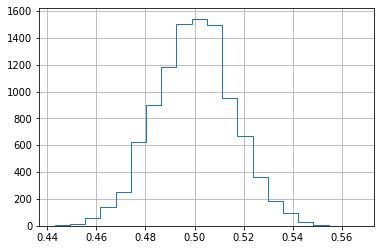

In [9]:
dist.Brown.hist(histtype='step',bins=20)

In [10]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

23.735

In [11]:
largepoll = pd.read_csv('poll-larger.csv')

In [12]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [13]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

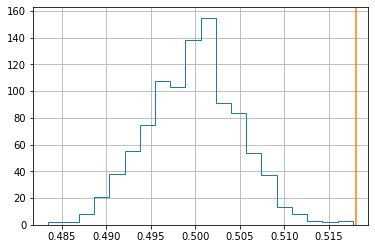

In [14]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')